<a href="https://colab.research.google.com/github/ShubhamKNIT/learn-python/blob/main/notebooks/01_nn_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with NN with TF

- In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.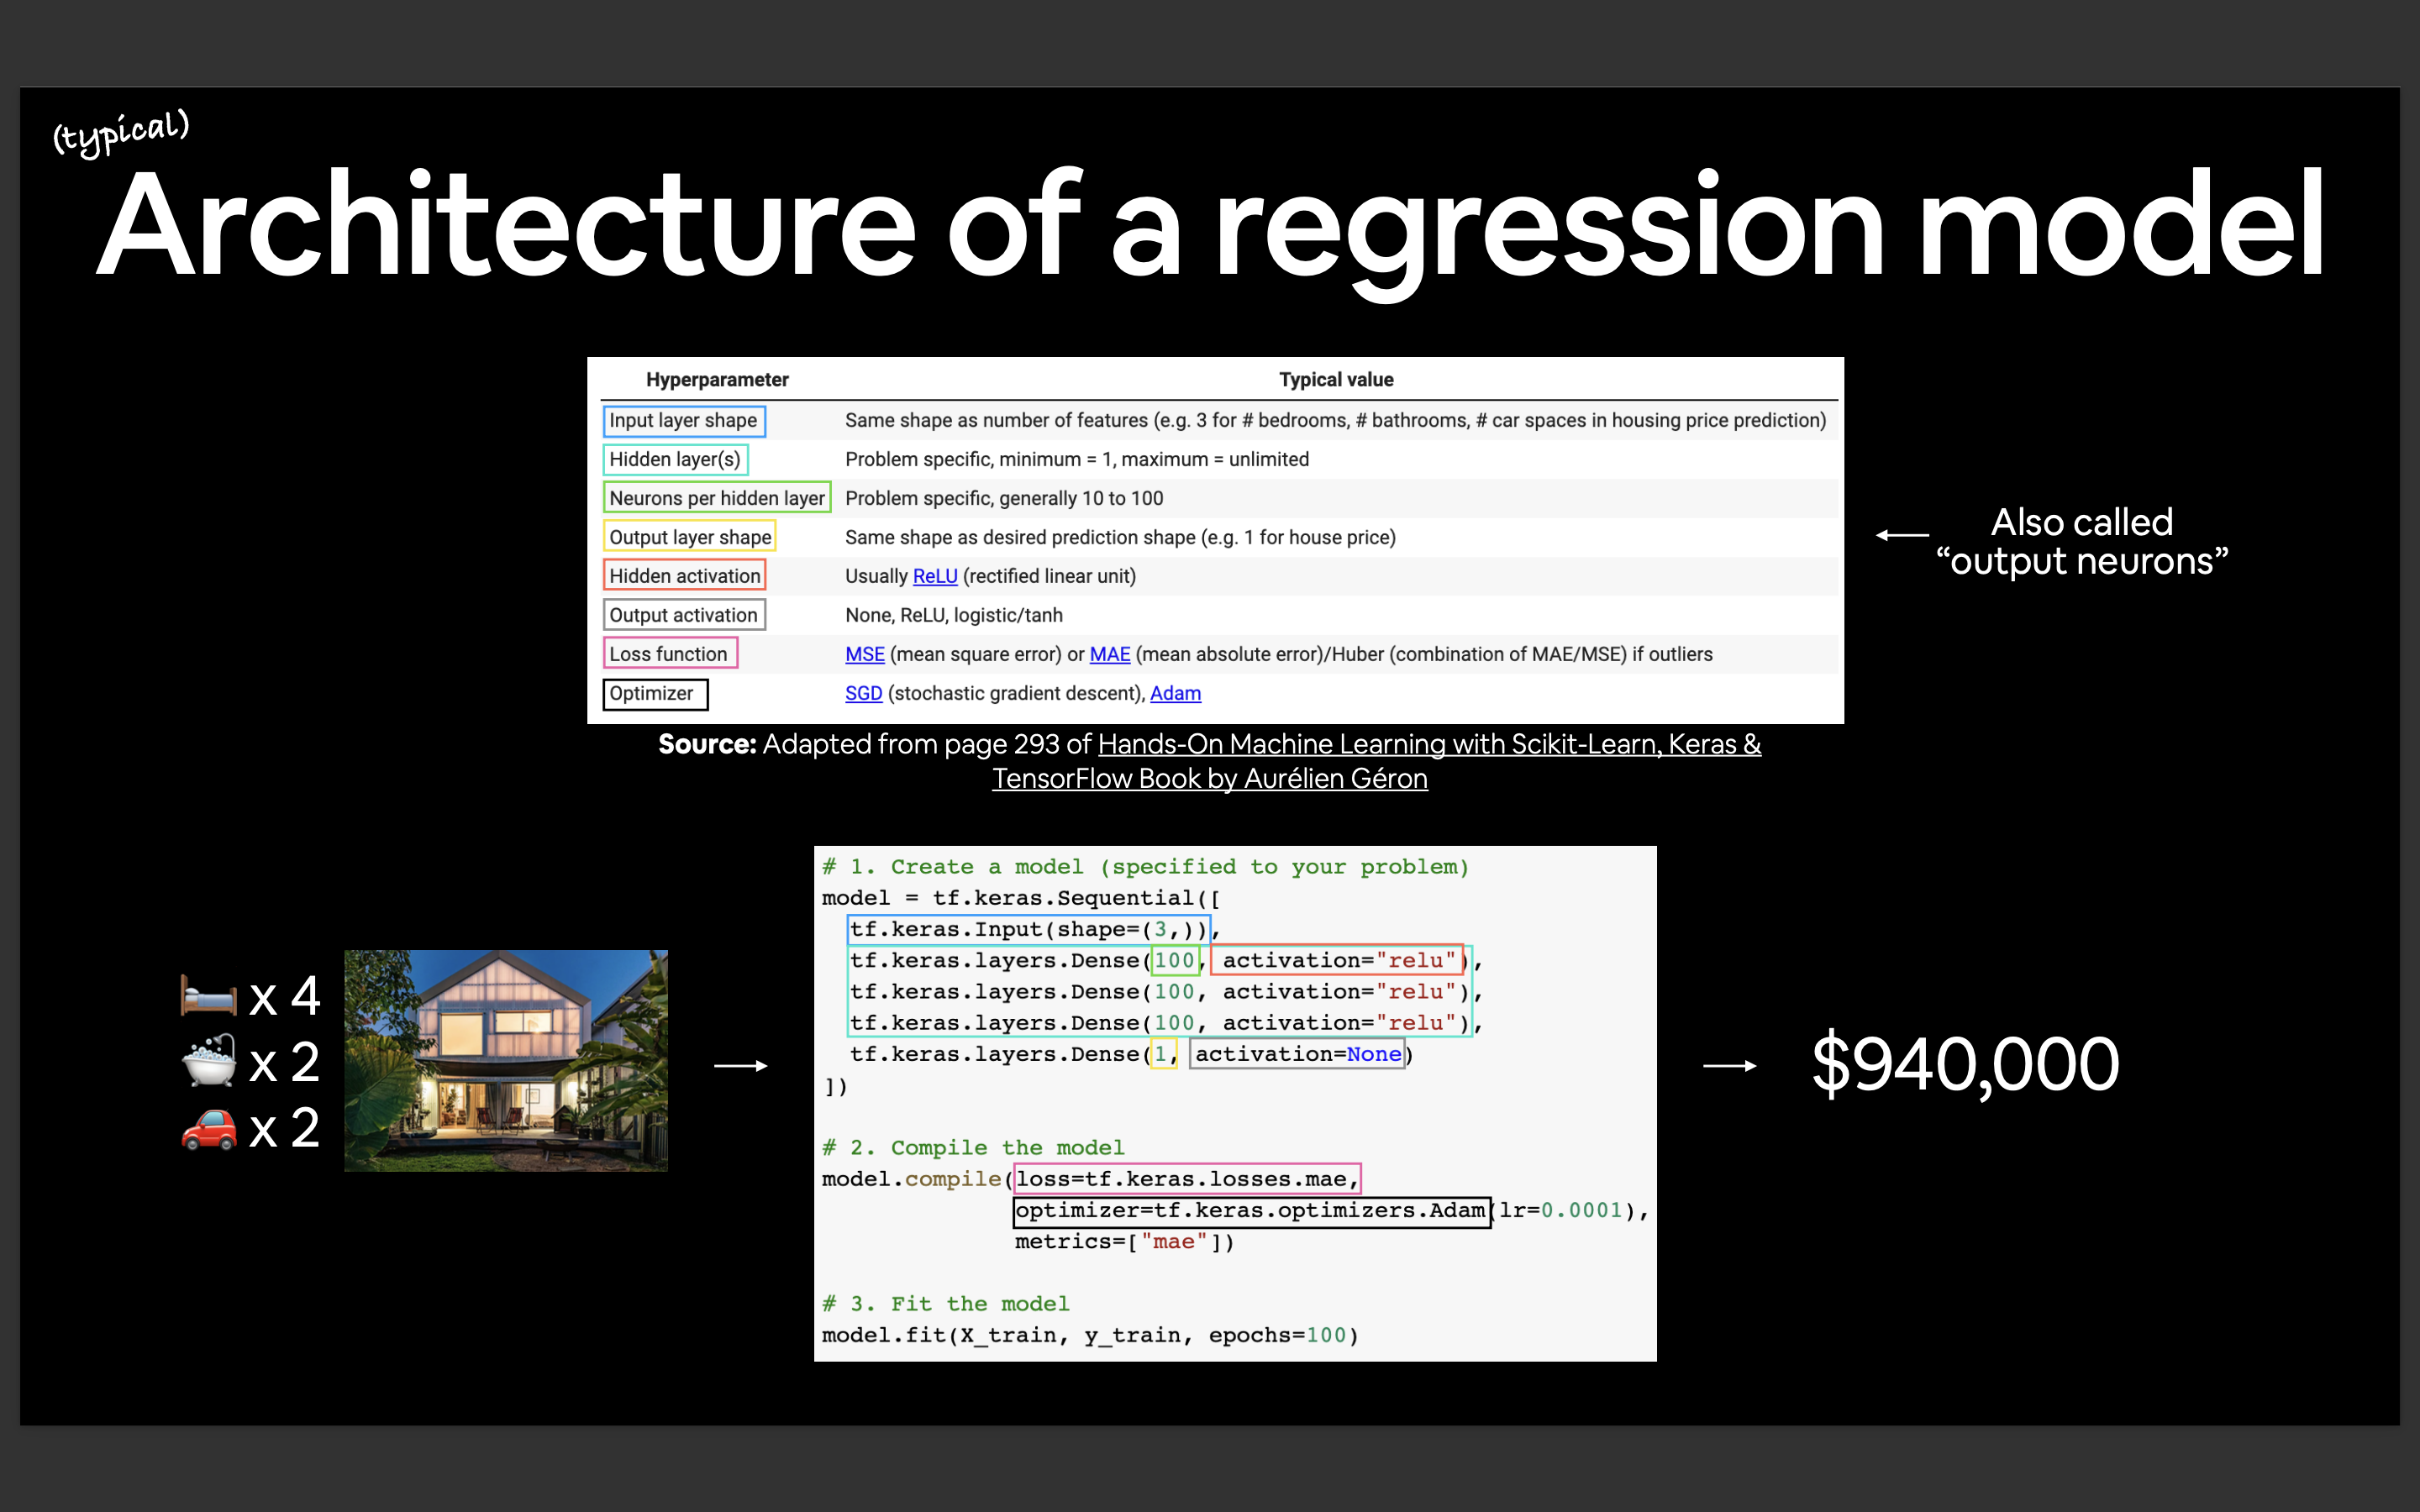

In [ ]:
# import tf
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

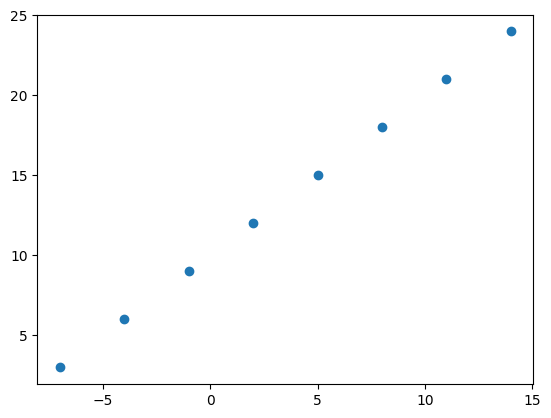

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creates features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualise the data
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([100000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([100000], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[0].ndim

0

In [ ]:
# Turn numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)

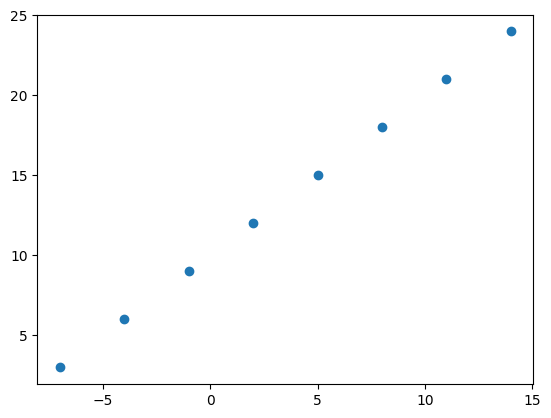

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TF

1. `Create a Model`: Define input layer, hidden layers, output layer for the DL Model.
2. `Compile the Model`: Define the Loss function, Optimizer function and define the metrics for evaluation.
3. `Fit the model`: Let the model fit the data.

In [ ]:
# Set the random seed
tf.random.set_seed(7)

# 1 Create a model
model = tf.keras.Sequential(
        tf.keras.layers.Dense(1)
    )

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 864ms/step - loss: 15.0852 - mae: 15.0852
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 14.8656 - mae: 14.8656
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 14.7331 - mae: 14.7331
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 14.6006 - mae: 14.6006
Epoch 5/5
1/1 [==============================] - 0s 27ms/step - loss: 14.4681 - mae: 14.4681


In [ ]:
X1 = tf.constant([5.0, 4.0, 6.0])
model.predict(X1)

1/1 [==============================] - 0s 154ms/step


array([[-1.2140061 ],
       [-0.96170485],
       [-1.4663073 ]], dtype=float32)

In [ ]:
X1 + 10

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([15., 14., 16.], dtype=float32)>

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Improving our Model
1. `Creating a model`: Add more hidden layers or rather increasing units of hidden layer or both.
2. `Compiling a model`: Changing optimization function or it's learning rate may improve the model.
3. `Fitting a model`: Increase the number of epochs

In [ ]:
# Let's rebuild model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 501ms/step - loss: 19.6462 - mae: 19.6462
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 19.3650 - mae: 19.3650
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 19.0837 - mae: 19.0837
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 18.8025 - mae: 18.8025
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 18.5212 - mae: 18.5212
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 18.2400 - mae: 18.2400
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 17.9587 - mae: 17.9587
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 17.6775 - mae: 17.6775
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 17.3962 - mae: 17.3962
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 17.1150 - mae: 17.1150
Epoch 11/100
1/1 [==============================

In [ ]:
X1

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([5., 4., 6.], dtype=float32)>

In [ ]:
model.predict(X1)

1/1 [==============================] - 0s 210ms/step


array([[ 9.379686],
       [ 7.683249],
       [11.076123]], dtype=float32)

In [ ]:
X1 + 10

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([15., 14., 16.], dtype=float32)>

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 240ms/step


array([[-10.977562 ],
       [ -5.88825  ],
       [ -0.7989379],
       [  4.2903743],
       [  9.379686 ],
       [ 14.468998 ],
       [ 19.55831  ],
       [ 24.647621 ]], dtype=float32)

In [ ]:
X + 10

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.001),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.3183 - mae: 13.3183
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 13.2532 - mae: 13.2532
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.1882 - mae: 13.1882
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1232 - mae: 13.1232
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0582 - mae: 13.0582
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9933 - mae: 12.9933
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9283 - mae: 12.9283
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8635 - mae: 12.8635
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7986 - mae: 12.7986
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7337 - mae: 12.7337
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 95ms/step


array([[-11.547029 ],
       [ -6.1033936],
       [ -0.6597591],
       [  4.7838755],
       [ 10.22751  ],
       [ 15.671146 ],
       [ 21.114782 ],
       [ 26.558414 ]], dtype=float32)

In [ ]:
X + 10

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [ ]:
model.predict([20.0, 30.0, 40.0])

1/1 [==============================] - 0s 107ms/step


array([[37.445683],
       [55.591133],
       [73.73659 ]], dtype=float32)

## Defining own activation functions

In [ ]:
def linear_activation(x, a=1.0, b=0.0):
    return a * x + b

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = lambda x : linear_activation(x, a=1.0, b=10.0)),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 19.7102 - mae: 19.7102
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 17.7934 - mae: 17.7934
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 15.8785 - mae: 15.8785
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 13.9655 - mae: 13.9655
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.0543 - mae: 12.0543
Epoch 6/100
1/1 [==============================] - 0s 47ms/step - loss: 10.2456 - mae: 10.2456
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 8.6375 - mae: 8.6375
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.0508 - mae: 7.0508
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 5.8076 - mae: 5.8076
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 4.6864 - mae: 4.6864
Epoch 11/100
1/1 [==============================] - 0s 12ms

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 191ms/step


array([[ 3.249374],
       [ 6.234257],
       [ 9.219144],
       [12.204028],
       [15.188912],
       [18.173796],
       [21.158678],
       [24.143566]], dtype=float32)

In [ ]:
X + 10

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [ ]:
model.predict([40.0, 50.0, 60.0])

1/1 [==============================] - 0s 326ms/step


array([[50.01256 ],
       [59.962177],
       [69.91178 ]], dtype=float32)

## Evaluating a Model

- Visualization might help in evaluating the model better.
- Visulize data, training, predictions to better understand what's going on with the evalutation

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for dataset
y = X + 10

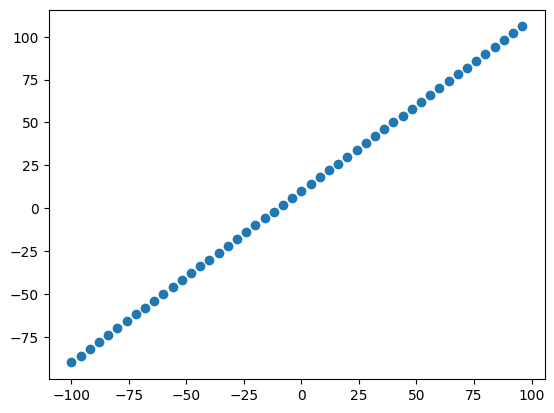

In [ ]:
# Visulize the dataset
import matplotlib.pyplot as plt
plt.scatter(X, y)

### Split train-valid-test sets
- Train set is for learning (70-80)%
- valid set is for tuning the mdoel (10-15)%
- test set is for evaluation (10-15)%

In [ ]:
len(X)

50

In [ ]:
# Split the data into train-test sets
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data

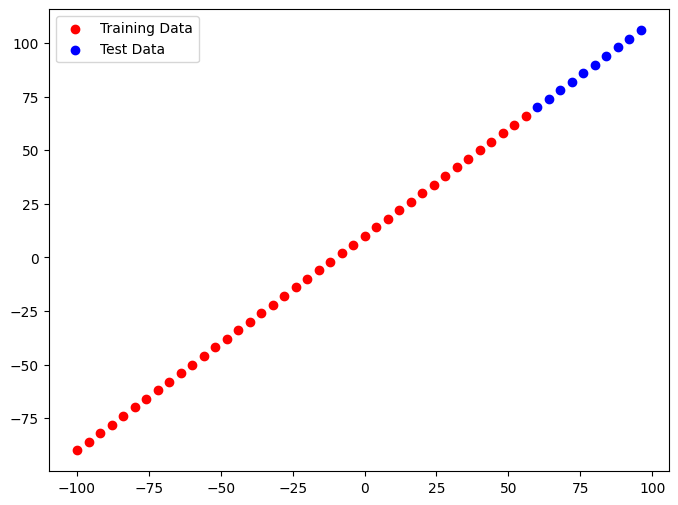

In [ ]:
plt.figure(figsize=(8, 6));
plt.scatter(X_train, y_train, c = 'r', label = "Training Data")
plt.scatter(X_test, y_test, c = 'b', label = "Test Data")
plt.legend();

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1,], name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

model.build()

# model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Total params: total number of parameters in model
- Trainable params are the parameters which can be updated during model training.
- Non-trainable params are the parameters which cannot be updated.


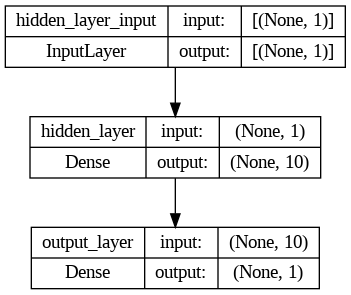

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

## Visulize model prediction
- It's often goog idea to plot true, preds at same plot or side-by-side to visualize the predictions

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 65.6667 - mae: 65.6667
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 64.8527 - mae: 64.8527
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 64.0907 - mae: 64.0907
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 63.3029 - mae: 63.3029
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 62.5261 - mae: 62.5261
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 61.7485 - mae: 61.7485
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 60.9936 - mae: 60.9936
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 60.2196 - mae: 60.2196
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 59.4449 - mae: 59.4449
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 58.6950 - mae: 58.6950
Epoch 11/100
2/2 [==============================] - 0s 

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 203ms/step


array([[52.971924],
       [56.50621 ],
       [60.04051 ],
       [63.57478 ],
       [67.109085],
       [70.64337 ],
       [74.17765 ],
       [77.71196 ],
       [81.24623 ],
       [84.78053 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c = 'b', label="Training Data")
    plt.scatter(test_data, test_labels, c = 'r', label="Test Data")
    plt.scatter(test_data, predictions, c = 'g', label="Predictions")
    plt.legend()

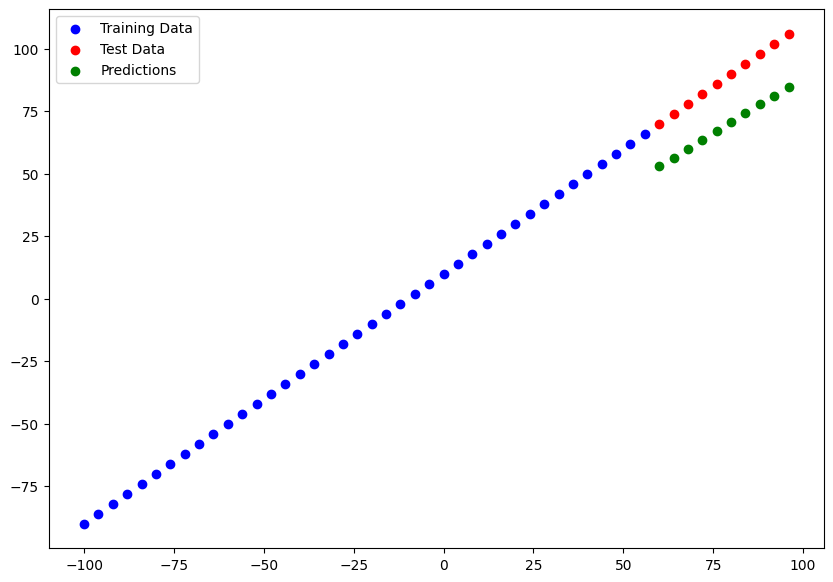

In [ ]:
plot_predictions()

## Evaluating the model with Regression Metrics
- Mean Absolute Error
- Mean Squared Error - When large errors are more significant use this.
- Huber (Combination of mae and mse) - Less senstive to outliers than MSE. Because MSE individually exlodes itself on detetcting outliers.

In [ ]:
y_pred.shape

(10, 1)

In [ ]:
y_pred = tf.constant(y_pred)
y_pred.shape

TensorShape([10, 1])

In [ ]:
y_pred = tf.squeeze(y_pred)

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 158ms/step - loss: 19.1238 - mae: 19.1238


[19.1237735748291, 19.1237735748291]

- `Note`: You must reshape or format the data correctly before evaluating.

In [ ]:
# Calculate MAE
tf.keras.losses.mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=19.123775>

In [ ]:
# Calculate MSE
tf.keras.losses.mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=367.50812>

In [ ]:
# Calculate Huber
tf.keras.losses.huber(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=18.623775>

In [ ]:
def mae(y_true, y_pred):
    return tf.keras.losses.mae(y_test, tf.squeeze(y_pred))
def mse(y_true, y_pred):
    return tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
def huber(y_true, y_pred):
    return tf.keras.losses.huber(y_test, tf.squeeze(y_pred))

## Running experiments to improve our model
1. Get more data
2. Make your model larger or complex
3. Train for longer

Let's do 3 model experiments:
1. `model_1`: same as original model. 1 layer, trained for 100 epochs
2. `model_2`: 2 layers, trained for 100 epochs
3. `model_3`: 2 layers, trained for 500 epochs

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Model_1

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 65.5913 - mae: 65.5913
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 30.0599 - mae: 30.0599
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 13.5674 - mae: 13.5674
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.5471 - mae: 13.5471
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 7.9883 - mae: 7.9883
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 16.2924 - mae: 16.2924
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7153 - mae: 18.7153
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 14.0245 - mae: 14.0245
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7398 - mae: 9.7398
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5758 - mae: 9.5758
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

1/1 [==============================] - 0s 64ms/step


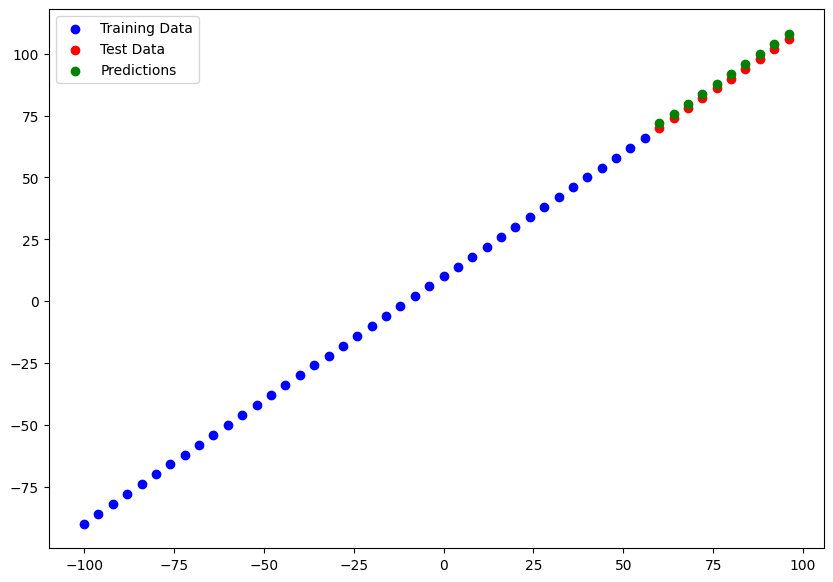

In [ ]:
# Make and plot predictions
y_preds1 = model_1.predict(y_test)
plot_predictions(predictions=y_preds1)

In [ ]:
mae_1 = mae(y_test, y_preds1)
mse_1 = mse(y_test, y_preds1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9626777>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.8596885>)

### Model_2

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="elu"),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 63.9576 - mae: 63.9576
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 34.8620 - mae: 34.8620
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 14.9882 - mae: 14.9882
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5184 - mae: 14.5184
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 7.4895 - mae: 7.4895
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 4.9717 - mae: 4.9717
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 13.6445 - mae: 13.6445
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 5.7031 - mae: 5.7031
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 13.9666 - mae: 13.9666
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 13.1215 - mae: 13.1215
Epoch 11/100
2/2 [==============================] - 0s 10ms/

1/1 [==============================] - 0s 85ms/step


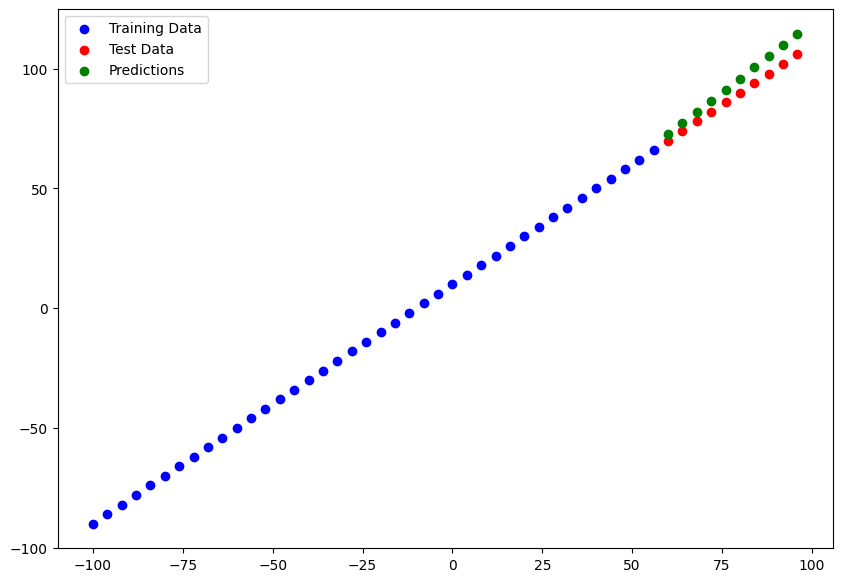

In [ ]:
y_preds2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds2)

In [ ]:
mae_2 = mae(y_test, y_preds2)
mse_2 = mse(y_test, y_preds2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=5.579818>,
 <tf.Tensor: shape=(), dtype=float32, numpy=34.86162>)

### Model_3

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

history = model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 8.2218 - mae: 8.2218
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 10.3147 - mae: 10.3147
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 12.7008 - mae: 12.7008
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 12.7733 - mae: 12.7733
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 12.7503 - mae: 12.7503
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 13.2691 - mae: 13.2691
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 15.2073 - mae: 15.2073
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1276 - mae: 11.1276
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 8.8606 - mae: 8.8606
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 9.3181 - mae: 9.3181
Epoch 11/500
2/2 [==============================] - 0s 9ms/ste

1/1 [==============================] - 0s 84ms/step


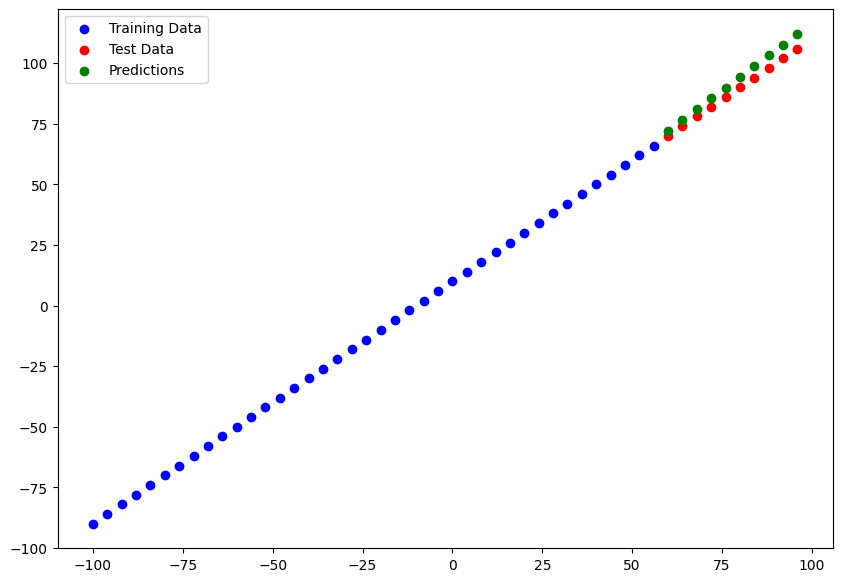

In [ ]:
y_preds3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds3)

In [ ]:
mae_3 = mae(y_test, y_preds3)
mse_3 = mse(y_test, y_preds3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=4.1432276>,
 <tf.Tensor: shape=(), dtype=float32, numpy=18.735302>)

Text(0, 0.5, 'epochs')

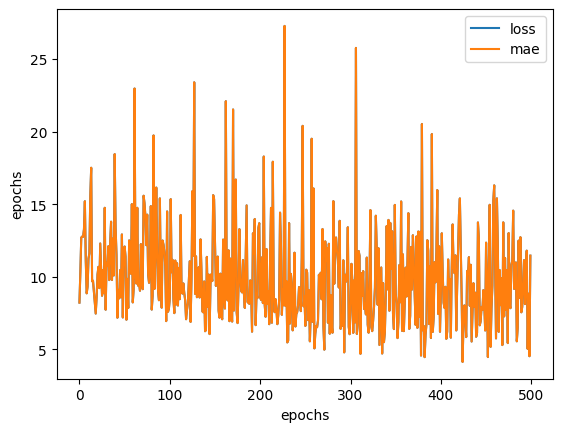

In [ ]:
# Plot hostory
import pandas as pd
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("epochs")

- `Note`: Use tensorflow early callback to stop training if model isn't improving
- `Note`: Start with small models and make it larger check the performance as well

In [ ]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,1.962678,3.859689
1,model_2,5.579818,34.861622
2,model_3,4.143228,18.735302


- `Note`: Reduce the time while doing experiments
- We can track our model experiment by using `tensorboard` to check which experiment is performing better.

## Saving our Models

Three high-level model formats are provided by tensorflow to save the models/object:
- `model.keras` (!new format) (Highly recommended)
- `model.h5` (hdf5 format)
- `SavedModel` (i.e, default format)

In [ ]:
model_1.save("./model_1.keras")
model_2.save("./model_2")
model_3.save("./model_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading our saved models

In [ ]:
load_model_1 = tf.keras.models.load_model("model_1.keras")
load_model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
load_model_2 = tf.keras.models.load_model("model_2")
load_model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
load_model_3 = tf.keras.models.load_model("model_3.h5")
load_model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Validating saved models after loading

In [ ]:
y_preds1 = model_1.predict(X_test)
load_model_1_preds = load_model_1.predict(X_test)
y_preds1 == load_model_1_preds

1/1 [==============================] - 0s 43ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
y_preds2 = model_2.predict(X_test)
load_model_2_preds = load_model_2.predict(X_test)
y_preds2 == load_model_2_preds

1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
y_preds3 = model_3.predict(X_test)
load_model_3_preds = load_model_3.predict(X_test)
y_preds3 == load_model_3_preds

1/1 [==============================] - 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Regression with Large Datasets

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -d data insurance.zip

Archive:  insurance.zip
  inflating: data/insurance.csv      


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### One-Hot Encoding

In [ ]:
df_one_hot = pd.get_dummies(df, dtype = np.int32)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Split into X & y

In [ ]:
X = df_one_hot.drop(labels = ["charges"], axis = 1)
y = df_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Create Training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Convert all the numpy arrays to tensors

In [ ]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
221,53,33.25,0,1,0,1,0,1,0,0,0
488,44,38.06,0,1,0,0,1,0,0,1,0
702,53,41.47,0,0,1,1,0,0,0,1,0
795,27,28.50,0,0,1,0,1,0,1,0,0
835,42,35.97,2,0,1,1,0,0,0,1,0


In [ ]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
637,35,38.095,2,1,0,1,0,1,0,0,0
327,45,36.480,2,0,1,0,1,0,1,0,0
377,24,40.150,0,0,1,0,1,0,0,1,0
1102,29,38.940,1,0,1,1,0,0,0,1,0
344,49,41.470,4,1,0,1,0,0,0,1,0


### Modelling + Experimentation

In [ ]:
tf.random.set_seed(7)

df_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(4, activation='linear'),
    tf.keras.layers.Dense(1)
])

df_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['mae']
)

history = df_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13247.9961 - mae: 13247.9961
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13138.3672 - mae: 13138.3672
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12892.2256 - mae: 12892.2256
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12314.7783 - mae: 12314.7783
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11112.4443 - mae: 11112.4443
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9224.9033 - mae: 9224.9033
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7673.7827 - mae: 7673.7827
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7380.6938 - mae: 7380.6938
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7348.4141 - mae: 7348.4141
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7313.1860 - mae:

In [ ]:
df_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3830.8450 - mae: 3830.8450


[3830.844970703125, 3830.844970703125]

In [ ]:
y_train.median(), y_train.mean()

(9401.1755, 13283.193678428972)

### Plot History

Text(0, 0.5, 'loss')

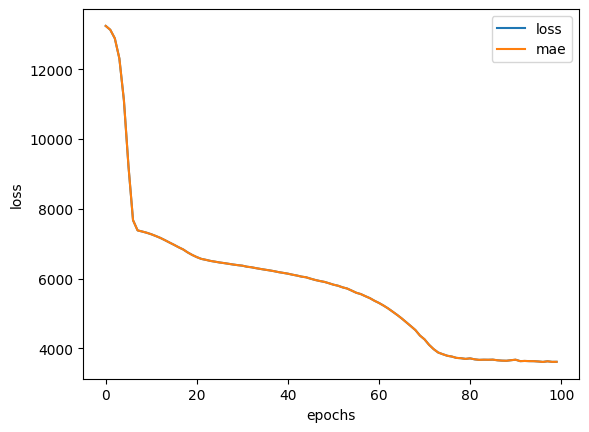

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

## ⚠️ How much longer should we train?
- Use `EarlyStopping` callback provided by tensorflow to stop training epochs if model does not improve.

## Preprocessing Data(Normalization and Standardization)

Feature Scaling:
- In terms of scaling values, neural network prefers normalization (MinMaxScaler) over standardization (StandardScaler).
- Standardization removes the effect of outliers.




In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<Axes: ylabel='Frequency'>

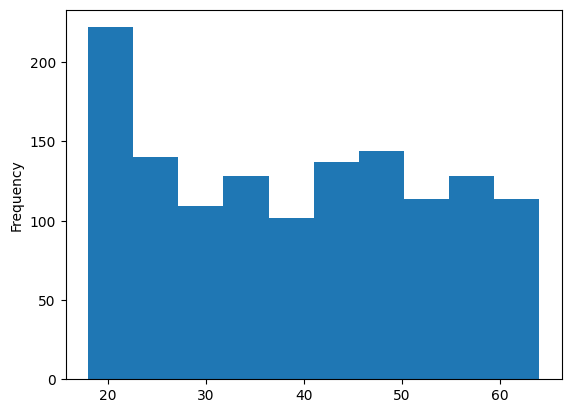

In [ ]:
X['age'].plot(kind = 'hist')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Make X & y
X = df.drop(['charges'], axis = 1)
y = df['charges']

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Fit the column tranformer and perform transformation
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[:5]

array([[0.        , 1.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.45652174, 0.41594382, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.06521739, 0.01610905, 0.2       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.19565217, 0.32176786, 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.39130435, 0.36362385, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [ ]:
X_train_normal.shape, X_test_normal.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [ ]:
tf.random.set_seed(7)

df_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear'),
    tf.keras.layers.Dense(1)
])

df_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['mae']
)

history = df_model_2.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13192.2686 - mae: 13192.2686
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13191.0527 - mae: 13191.0527
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13187.6045 - mae: 13187.6045
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13178.2070 - mae: 13178.2070
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13155.6729 - mae: 13155.6729
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13109.1025 - mae: 13109.1025
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13023.5645 - mae: 13023.5645
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12880.3311 - mae: 12880.3311
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12656.7998 - mae: 12656.7998
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.95

In [ ]:
df_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3232.8777 - mae: 3232.8777


[3232.877685546875, 3232.877685546875]

In [ ]:
y_test.median(), y_test.mean()

(8538.979725000001, 13581.419296119402)

Text(0, 0.5, 'loss')

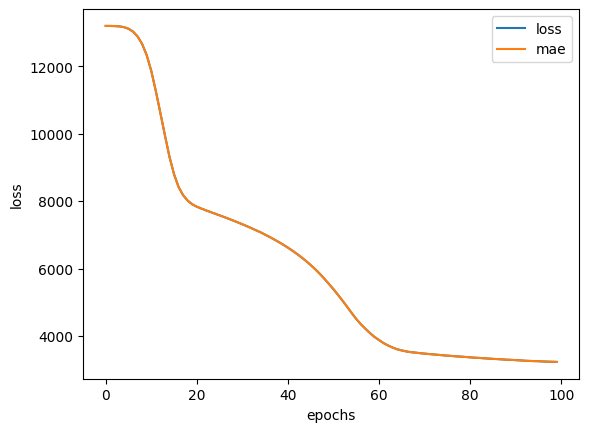

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')